# EXAMEN FINAL ANALISIS DE DATOS

Martín Cruzat, mcruzatu@udd.cl

## 6 DE JULIO DEL 2021

In [153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [154]:
data_1 = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
data_2 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis_std.csv')
data_3 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto77/total_vacunados_region_edad.csv')

# Link para obtener Vacunados por Región.
# https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto77/total_vacunados_region_edad.csv

# Link para obtener Riqueza por comuna
# https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv

# Link para obtener los datos del Total de Vacunados por Region y por Edad
# https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto77/total_vacunados_region_edad.csv

In [155]:
data_2 = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis_std.csv",
                         keep_default_na=False, na_values=[""])
data_3 = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto77/total_vacunados_region_edad.csv",
                         keep_default_na=False, na_values=[""])

In [156]:
data_1['Riqueza']=data_1['HDI']

In [157]:
data_1

,comuna,LEI,II,EI,idh,HDI,Riqueza
0,13101,0.791672,0.873137,0.924099,0.807,0.861222,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015,0.742015
5,13106,0.790810,0.784378,0.729145,0.735,0.767604,0.767604
6,13107,0.726330,0.775631,0.641707,0.737,0.712375,0.712375
7,13108,0.821551,0.751105,0.722493,0.709,0.763935,0.763935
8,13109,0.856570,0.835740,0.860235,0.775,0.850780,0.850780
9,13110,0.773094,0.824255,0.791155,0.804,0.795888,0.795888


In [158]:
data_2

,Region,Codigo region,Comuna,Codigo comuna,Fecha,Segunda Dosis
0,Arica y Parinacota,15,Arica,15101.0,2020-12-24,0.0
1,Arica y Parinacota,15,Camarones,15102.0,2020-12-24,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,2020-12-24,0.0
3,Arica y Parinacota,15,Putre,15201.0,2020-12-24,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,2020-12-24,NaN
...,...,...,...,...,...,...
70223,Magallanes y la Antartica,12,Rio Verde,12103.0,2021-07-05,0.0
70224,Magallanes y la Antartica,12,San Gregorio,12104.0,2021-07-05,0.0
70225,Magallanes y la Antartica,12,Timaukel,12303.0,2021-07-05,1.0
70226,Magallanes y la Antartica,12,Torres del Paine,12402.0,2021-07-05,1.0


In [159]:
data_3

,Region,Dosis,12,13,14,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
0,Total,Primera,NaN,NaN,NaN,12011.0,12752.0,13537.0,14707.0,14698.0,...,138997.0,129122.0,122113.0,117332.0,112615.0,106622.0,100242.0,94485.0,89071.0,80905.0
1,Total,Segunda,NaN,NaN,NaN,9.0,13.0,9.0,14.0,19.0,...,135417.0,125990.0,119220.0,114582.0,110129.0,104229.0,98026.0,92405.0,87107.0,79110.0
2,Total,Unica,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,30.0,24.0,18.0,11.0,12.0,13.0,9.0,5.0,4.0,5.0
3,Antofagasta,Primera,269.0,297.0,302.0,320.0,401.0,3869.0,3358.0,5624.0,...,2792.0,2543.0,2429.0,2180.0,2088.0,1932.0,1748.0,1641.0,1398.0,9362.0
4,Antofagasta,Segunda,0.0,0.0,0.0,0.0,0.0,0.0,1145.0,1491.0,...,2719.0,2469.0,2369.0,2133.0,2025.0,1884.0,1700.0,1610.0,1355.0,9088.0
5,Antofagasta,Unica,0.0,0.0,0.0,0.0,0.0,0.0,3186.0,1237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Arica y Parinacota,Primera,158.0,153.0,166.0,182.0,237.0,1274.0,1807.0,2058.0,...,1415.0,1391.0,1347.0,1274.0,1196.0,1025.0,1096.0,931.0,776.0,5273.0
7,Arica y Parinacota,Segunda,0.0,0.0,0.0,0.0,1.0,1.0,472.0,672.0,...,1351.0,1342.0,1297.0,1231.0,1154.0,984.0,1056.0,893.0,743.0,5026.0
8,Arica y Parinacota,Unica,0.0,0.0,0.0,0.0,0.0,0.0,401.0,278.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Atacama,Primera,125.0,130.0,161.0,163.0,229.0,1280.0,2108.0,2476.0,...,1723.0,1548.0,1500.0,1307.0,1359.0,1239.0,1098.0,1051.0,1014.0,6663.0


In [160]:
spector_data_1 = sm.datasets.spector.load(as_pandas=False)
spector_data_1.exog = sm.add_constant(spector_data_1.exog, prepend=False)
mod = sm.OLS(spector_data_1.endog, spector_data_1.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 06 Jul 2021   Prob (F-statistic):            0.00157
Time:                        21:29:27   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

In [161]:
spector_data_3 = sm.datasets.spector.load(as_pandas=False)
spector_data_3.exog = sm.add_constant(spector_data_3.exog, prepend=False)
mod = sm.GLS(spector_data_3.endog, spector_data_3.exog)
res = mod.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            GLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 06 Jul 2021   Prob (F-statistic):            0.00157
Time:                        21:29:27   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

In [162]:
%matplotlib inline

In [163]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

In [164]:
se = np.vstack([[res_wls.bse], [res_ols.bse], [res_ols.HC0_se],
                [res_ols.HC1_se], [res_ols.HC2_se], [res_ols.HC3_se]])
se = np.round(se,4)
colnames = ['x1', 'const']
rownames = ['WLS', 'OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC3', 'OLS_HC3']
table = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(table)

          x1   const 
---------------------
WLS     0.1689 0.0216
OLS     0.3524 0.0304
OLS_HC0 0.2845 0.0424
OLS_HC1 0.2902 0.0433
OLS_HC3 0.2947  0.044
OLS_HC3 0.3052 0.0456
---------------------


In [165]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.95, res_ols.df_resid)

In [166]:
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

ValueError: Illegal format string "HDI"; two marker symbols

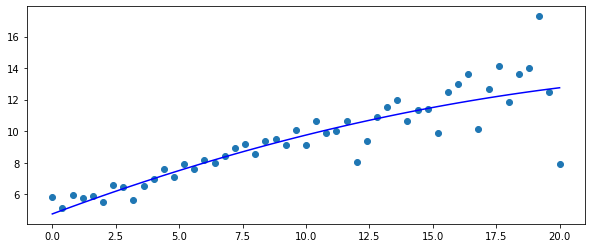

In [167]:
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'HDI')
ax.plot(x, iv_u_ols, 'HDI', label="OLS")
ax.plot(x, iv_l_ols, 'HDI')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

In [ ]:
# Según la gráfica se puede determinar que las personas que tienen mayor riqueza son los que están mayoritariamente vacunados,
# pero, esto se debe a que los adultos mayores y los adultos mayores de 45 años tienden a tener mayores ahorros, y por lo tanto,
# mayor riqueza que el resto de la población, y dado que el COVID le resulta más complicado a los mayores, entonces, es por 
# alguna forma u otra lógica, ya que, ellos son los que se tienen que vacunar en primer lugar.
# Links importantes de investigación: https://github.com/MinCiencia/Datos-COVID19